In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset
# Specify the file path where the CSV file is located
file_path = "C:/Users/atiya/Flip Robbo/Evaluation projects/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Read the CSV file into a DataFrame
hr_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
print(hr_data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
# Check for missing values
print(hr_data.isnull().sum()) # no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Encoding categorical variables
hr_data_encoded = pd.get_dummies(hr_data, drop_first=True)

# EDA

In [7]:
# Summary statistics
print(hr_data_encoded.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [8]:
# Distribution analysis
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                      'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = [col for col in hr_data_encoded.columns if col not in numerical_features]


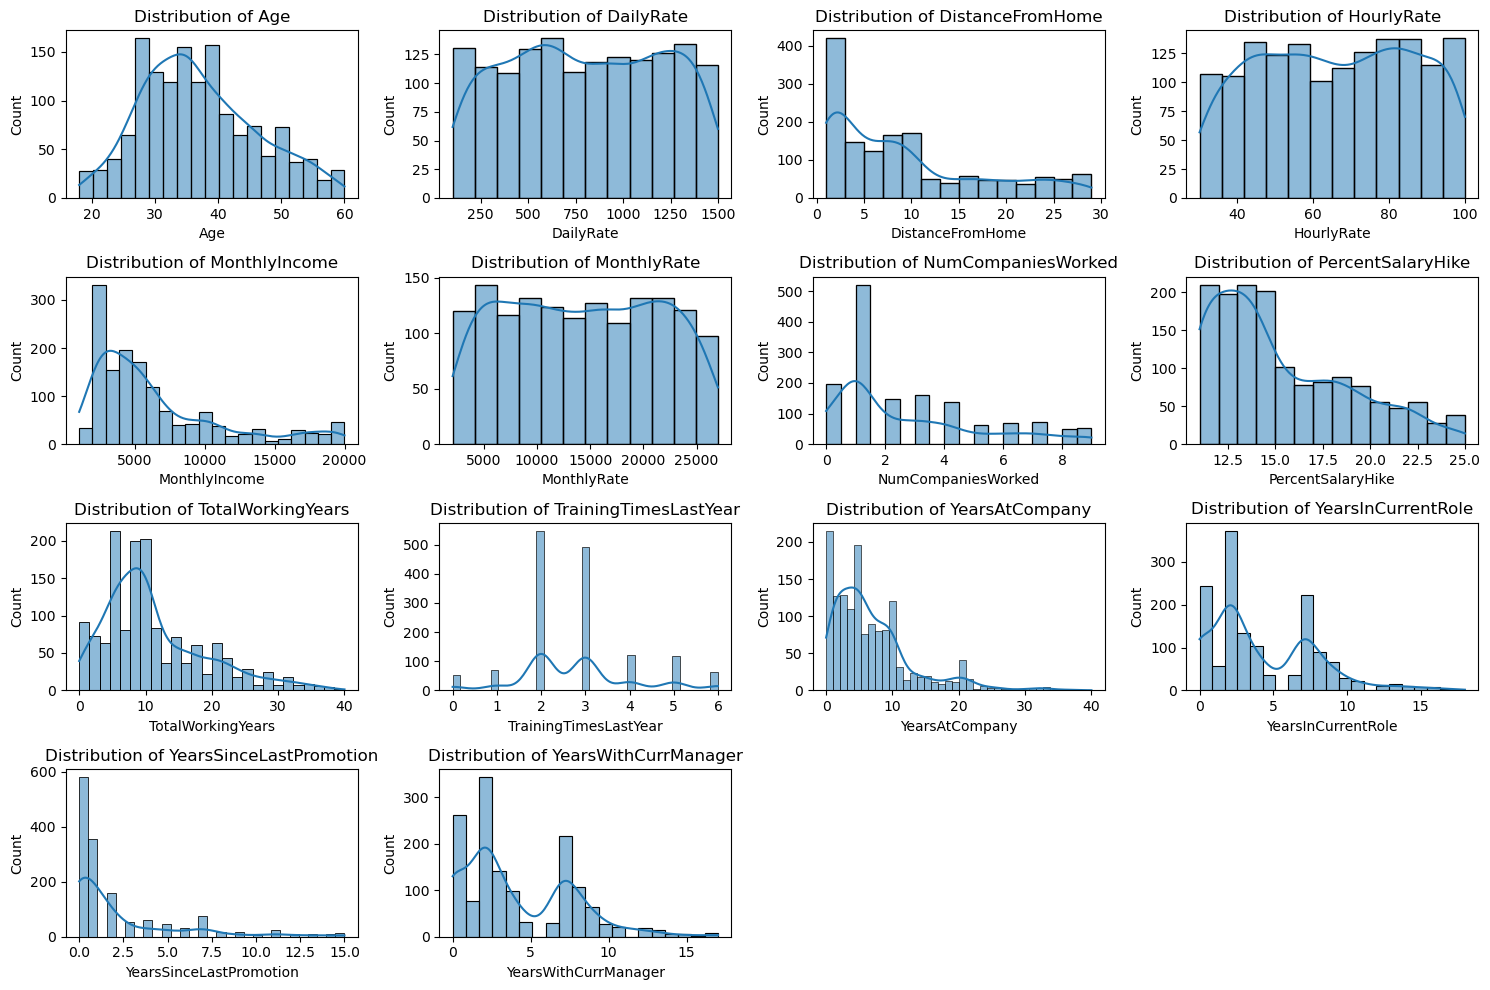

In [9]:
# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(hr_data_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

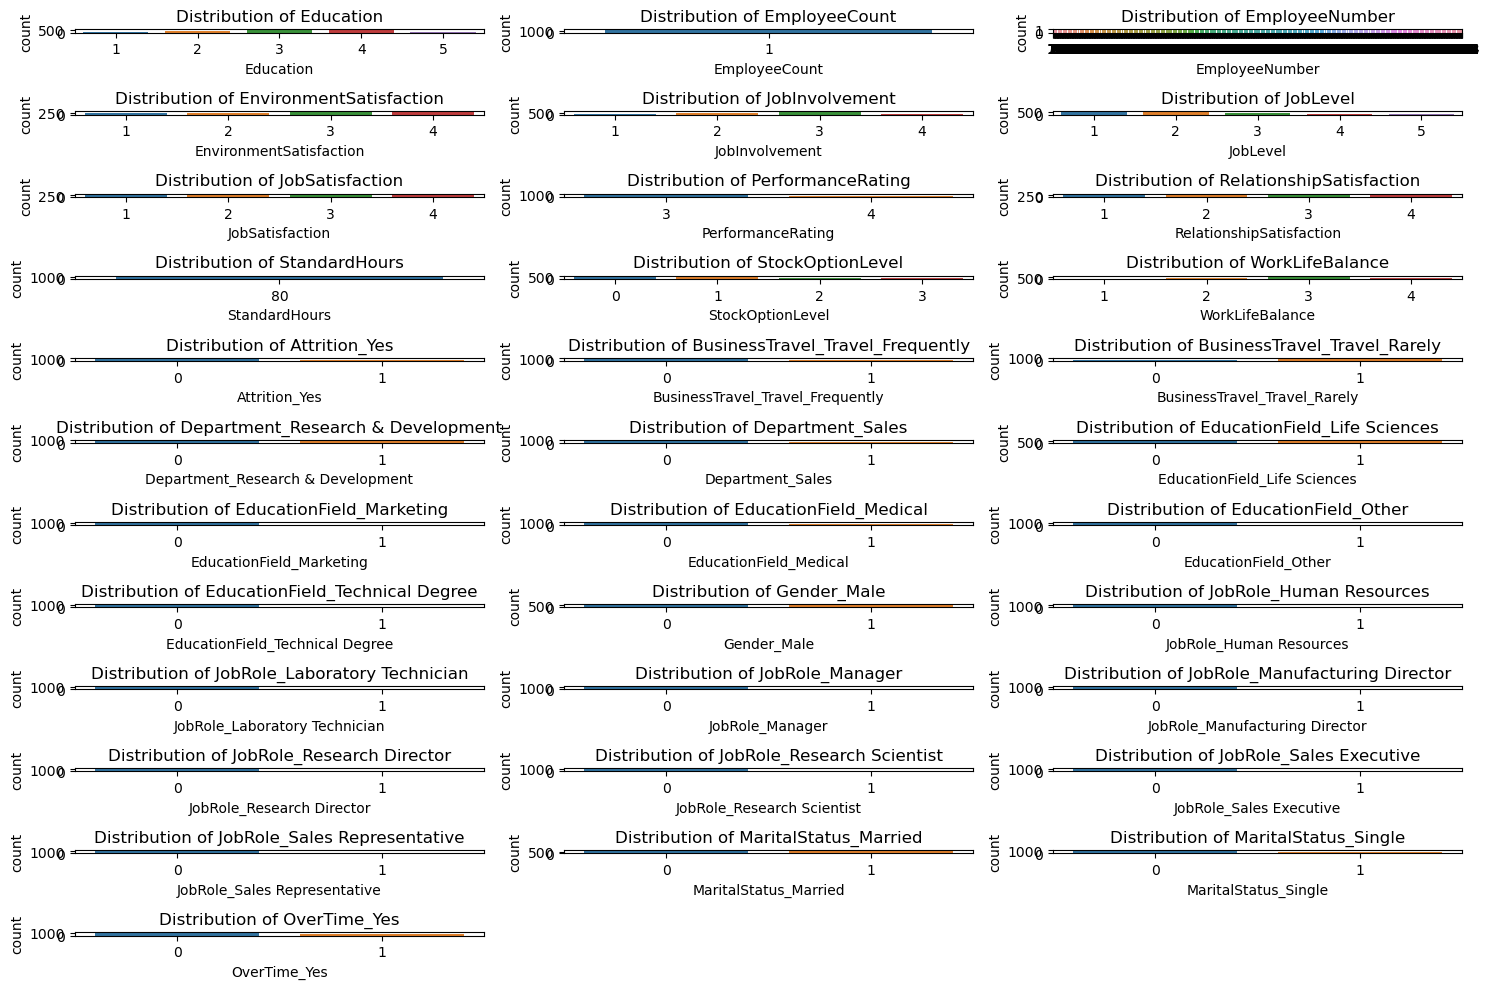

In [13]:
# Boxplot of categorical features
plt.figure(figsize=(15, 10))
n_cols = min(3, len(categorical_features))
n_rows = (len(categorical_features) - 1) // n_cols + 1
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=feature, data=hr_data_encoded)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

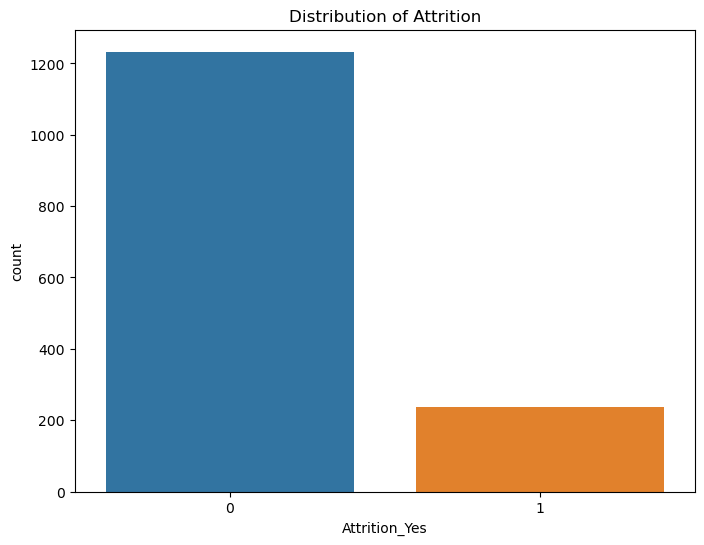

In [14]:
# Target variable analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition_Yes', data=hr_data_encoded)
plt.title('Distribution of Attrition')
plt.show()


# Model Building 

In [16]:
# Split the data into features and target variable
X = hr_data_encoded.drop('Attrition_Yes', axis=1)
y = hr_data_encoded['Attrition_Yes']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC-AUC': roc_auc}

# Display model evaluation results
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


C:\Users\atiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\atiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression:
Accuracy: 0.8673469387755102
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5

Random Forest:
Accuracy: 0.8741496598639455
Precision: 0.6666666666666666
Recall: 0.10256410256410256
F1-score: 0.17777777777777778
ROC-AUC: 0.5473604826546004

Gradient Boosting:
Accuracy: 0.8809523809523809
Precision: 0.6428571428571429
Recall: 0.23076923076923078
F1-score: 0.339622641509434
ROC-AUC: 0.6055806938159879


# Feature Important Analysis  

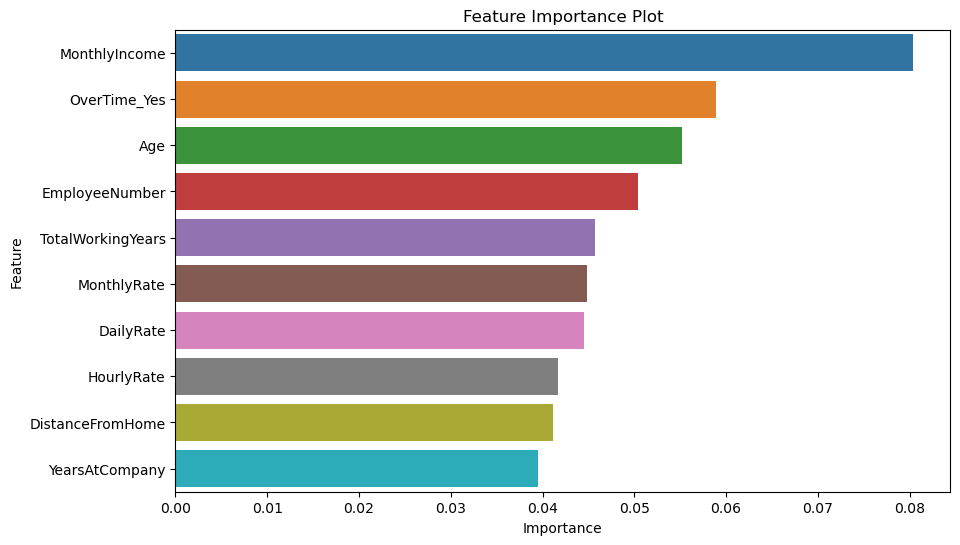

In [20]:
# Extract feature importances for Random Forest model
importances = models['Random Forest'].feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:10])
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the Feature Imortance plot, the top features that contribute the most to employee attrition are MMonthlyIncome, Overtime_Yes and Age this indicates their significant role in predicting attrition. 

# Conclusion  

1. Feature Importance Analysis:

- The top features contributing to employee attrition are MonthlyIncome, Overtime_Yes, and Age, indicating their significant role in predicting attrition. Employees with lower income, working overtime, and older age are more likely to leave the company.

2. Model Performance:

- Logistic Regression: While the logistic regression model has the highest accuracy, it fails to predict any positive cases (attrition), resulting in precision, recall, and F1-score of 0. This suggests that the model is not effective in identifying employees at risk of attrition.
- Random Forest: The Random Forest model achieves a slightly higher accuracy compared to logistic regression, but its precision, recall, and F1-score are relatively low. However, it shows some improvement in identifying positive cases compared to logistic regression.
- Gradient Boosting: The Gradient Boosting model performs slightly better than the Random Forest model in terms of precision, recall, and F1-score. It shows the highest ability to correctly identify positive cases among the three models.


Overall,The analysis reveals the challenges in accurately predicting employee attrition using the selected features and machine learning models. While certain features like MonthlyIncome, Overtime_Yes, and Age play a significant role, the models' performance in identifying at-risk employees is limited.
HR departments should focus on improving the models' predictive capabilities by incorporating additional relevant features and exploring more advanced modeling techniques. Additionally, proactive measures such as improving working conditions, providing career development opportunities, and implementing retention strategies tailored to employees' needs can help mitigate attrition and foster employee retention.